# Problem pierwszy - grzejnik przy oknie czy naprzeciwko

W tym tekście skupimy się na zamodelowaniu problemu, jakim jest położenie grzejnika w stosunku do okna. Zbadamy, jak zmienia się temperatura w pomieszczeniu, jakie jest odchylenie standardowe temperatury, a także jakie jest zużycie energii w zależności od położenia grzejnika.

## Wprowadzenie teoretyczne

W naszym przypadku równanie ciepła na obszarze $\Omega$ ma postać:

$$\begin{cases}
\frac{\partial u}{\partial t} = \alpha \Delta u + f_i(x, u), &\quad x \in R_i, t \in [0, T], i \in \{1, ..., N_{rooms}\}  \\
\frac{\partial u}{\partial \vec n} = g_i(x, u), &\quad x \in W_i, t \in [0, t], i \in \{ 1, ..., N_{windows}\} \\
\frac{\partial u}{\partial \vec n} = h_i(x, u), &\quad x \in \mathcal{W}_i, t \in [0, T], i \in \{1, N_{walls} \}  \\
u(x, 0) = u_0(x) 
\end{cases}$$

gdzie $\alpha = 2.239 * 10^{-5}$ jest [współczynnikiem wyrównania temperatur w temperaturze 25 stopni](https://www.engineeringtoolbox.com/air-thermal-diffusivity-d_2011.html) $f_i(x, u) = u \cdot \frac{P \cdot r}{p \cdot |\mathcal{R_i}| \cdot c}$ dla $\mathcal{R_i}$ będącego obszarem umiejscowienia grzejnika. Fizyczne wartości przyjęte dla tego równania to:
- P = 915.0 [Grzejnik 1. typu 600x1000 75/65](https://ezelazny.pl/blog/post/grzejniki-perfekt-tabela-mocy)
- r = 297.05 [J/(kg * K)](https://pl.wikipedia.org/wiki/Sta%C5%82a_gazowa)
- p = 101325.0 [Ciśnienie powietrza w temperaturze 20 stopni Celsjusza w Pascalach](https://pl.wikipedia.org/wiki/Ci%C5%9Bnienie_atmosferyczne)
- c = 1005.0 [Ciepło właściwe powietrza](https://pl.wikipedia.org/wiki/Ciep%C5%82o_w%C5%82a%C5%9Bciwe#HeroSection)

Z kolei funkcje $g_i(x, u)$ oraz $h_i(x, u)$ są postaci $$\frac{\partial u}{\partial \vec n} = - \frac{\lambda_{mat}}{\lambda_{air}} (u - u_{zew})$$ gdzie $\lambda_{mat}$ to przewodność cieplna dla okna i ściany. Wyliczymy go przy pomocy współczynnika $U$ oznaczającego współczynnik przeinkania ciepła. Można wtedy uznać, że $$\lambda_{mat} = U \cdot d$$ gdzie $d$ oznacza grubość materiału (w naszym przypadku będzie to hx lub hy). Według [Rozporządzenia ministra infrastruktury z dnia 12 kwietnia 2002 rokuw sprawie warunków technicznych, jakim powinny odpowiadać budynki i ich usytuowanie](https://sip.lex.pl/akty-prawne/dzu-dziennik-ustaw/warunki-techniczne-jakim-powinny-odpowiadac-budynki-i-ich-usytuowanie-16964625) możemy zobaczyć w załączniku drugim, że wartość $U$ dla ściany zewnętrznej powinna być nie mniejsza niż $0.2$, natomiast dla okna nie mniejsza niż $0.9$. Na podstawie tych wartości wyznaczymy odpowiednie lambdy już w odpowiednim kodzie.

Wykonamy obliczenia metodą niejawną z krokiem czasowym $h_t = 1.0$ reprezentującym jedną sekundę. Czas wykonania będzie wynosił 86400 sekund (a zatem 24 godziny). W kodzie mamy pewne założenia:
- temperatura początkowa wynosi 290K (około 17 stopni Celsjusza),
- temperatura na zewnątrz wynosi 260K (około -10 stopni Celsjusza),
- grzejnik jest ustawiony na temperaturę 298K (około 25 stopni Celsjusza),
- przyjmujemy dla uproszczenia, że czujniki są rozmieszczone w całym pomieszczeniu, a zatem grzejnik wyłącza się, gdy średnia temperatura w pomieszczeniu wyniesie 298K,
- przyjmujemy, że grzejnik nie może mieć temperatury wyższej niż 348K (około 75 stopni Celsjusza) i jeśli tę temperaturę przekroczy również się wyłączy,
- przyjmujemy wymiary pokoju 2mx2m (przedział x oraz y $(0, 2)$)

Zbadamy trzy położenia grzejnika - przy samym oknie, naprzeciwko okna oraz na ścianie po lewej stronie od okna. Poniżej widać kod wraz z wykresami oraz animacją prezentującą zmianę temperatury w kolejnych minutach

In [ ]:
import sys
from pathlib import Path

NOTEBOOK_DIR = Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent

print("Notebook:", NOTEBOOK_DIR)
print("Project root:", PROJECT_ROOT)

sys.path.insert(0, str(PROJECT_ROOT))
print("Added to sys.path")

Notebook: C:\Users\ameli\Desktop\Studia Programowanie\Ciepło modelowanie\notebooks
Project root: C:\Users\ameli\Desktop\Studia Programowanie\Ciepło modelowanie
Added to sys.path


In [6]:
import pipelines
print("pipelines found at:", pipelines.__file__)

pipelines found at: C:\Users\ameli\Desktop\Studia Programowanie\Ciepło modelowanie\pipelines\__init__.py


c:\Users\ameli\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 86400/86400 [00:35<00:00, 2426.06it/s]



--- Statystyki: Grzejnik: Pod oknem ---
Średnia: 22.13°C
Sigma (std): 13.94°C
Max: 61.63°C | Min: 1.72°C

--- Statystyki: Grzejnik: Naprzeciw okna ---
Średnia: 22.01°C
Sigma (std): 17.63°C
Max: 63.21°C | Min: -3.41°C

--- Statystyki: Grzejnik: Z boku ---
Średnia: 22.14°C
Sigma (std): 17.72°C
Max: 67.23°C | Min: -3.65°C


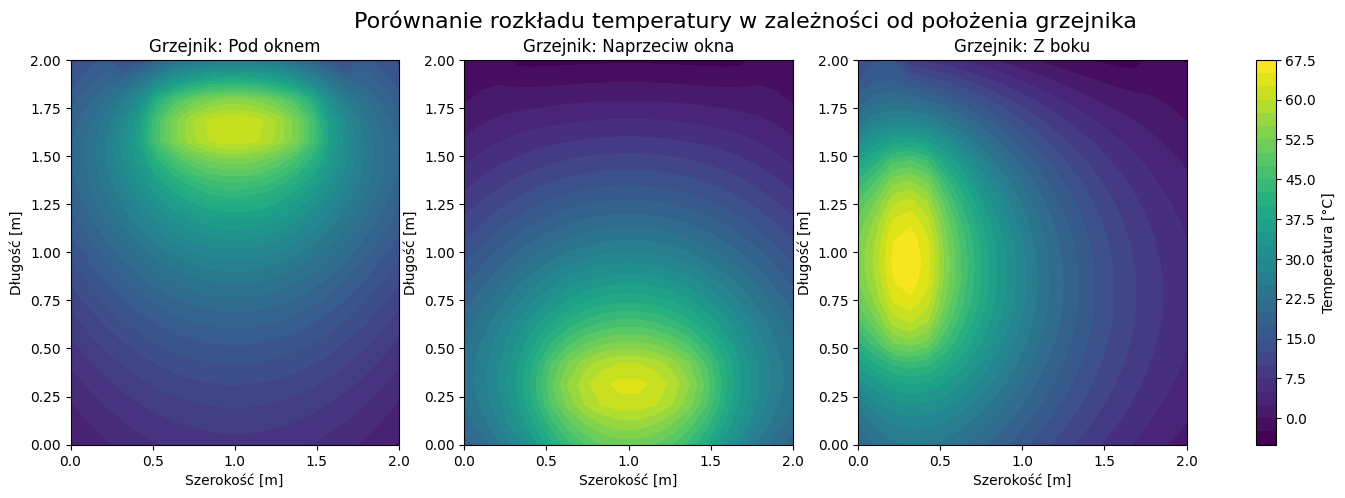

Zużycie energii w pierwszym pokoju: 538.7043017364261
Zużycie energii w drugim pokoju: 381.5885122078116
Zużycie energii w trzecim pokoju410.8343550627355


KeyboardInterrupt: 

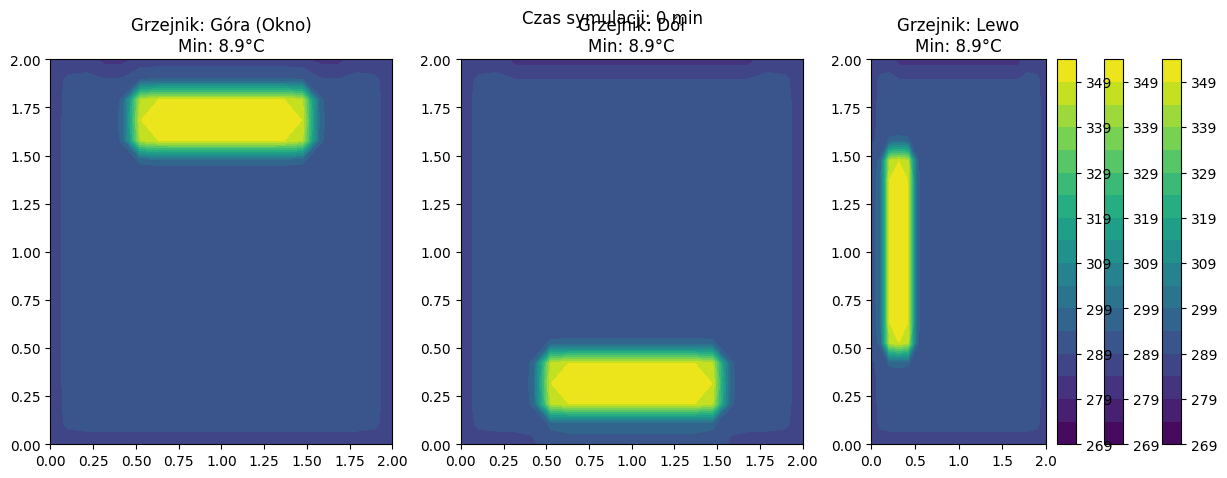

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from pipelines.room import Room
from pipelines.heater import Heater
from pipelines.heatercontroller import HeaterController
from pipelines.boundaryconditions import BoundaryConditions
from pipelines.heatsolver import HeatSolver
import matplotlib.animation as animation

room_width = 2.0
room_length = 2.0

c = 1005.0
p = 101325.0
P = 915.0
r = 287.05

U_window = 0.9 #załącznik 2.
U_wall = 0.2
lambda_air = 0.0262

ht = 1.0
T = 3600.0 * 24
t = np.arange(0, T, ht)

Nx, Ny = 20, 20
x = np.linspace(0, room_width, Nx)
y = np.linspace(0, room_length, Ny)
hx, hy = x[1] - x[0], y[1] - y[0]
room1 = Room(Nx, Ny, hx, hy, 0, 0, room_width, room_length)
room2 = Room(Nx, Ny, hx, hy, 0, 0, room_width, room_length)
room3 = Room(Nx, Ny, hx, hy, 0, 0, room_width, room_length)
lambda_wall = U_wall * hx
lambda_window = U_window * hx

X, Y = np.meshgrid(x, y)
X_flat, Y_flat = X.flatten(), Y.flatten()

T_out = 263.0
T_initial = 293.0
T_target = 295.0

window_width = 1.5
window_center = room_width / 2
window_x_min = window_center - window_width / 2
window_x_max = window_center + window_width / 2
ind_window = (Y_flat == y[-1]) & (X_flat >= window_x_min) & (X_flat <= window_x_max)
room1.add_window("top", ind_window, lambda_window)
room2.add_window("top", ind_window, lambda_window)
room3.add_window("top", ind_window, lambda_window)

ind_left = np.where(X_flat == x[0], True, False)
ind_right = np.where(X_flat == x[-1], True, False)
ind_bottom = np.where(Y_flat == y[0], True, False)
ind_top = np.where(Y_flat == y[-1], True, False) & ~ind_window
room1.add_walls("left", ind_left, lambda_wall)
room1.add_walls("right", ind_right, lambda_wall)
room1.add_walls("bottom", ind_bottom, lambda_wall)
room1.add_walls("top", ind_top, lambda_wall)
room2.add_walls("left", ind_left, lambda_wall)
room2.add_walls("right", ind_right, lambda_wall)
room2.add_walls("bottom", ind_bottom, lambda_wall)
room2.add_walls("top", ind_top, lambda_wall)
room3.add_walls("left", ind_left, lambda_wall)
room3.add_walls("right", ind_right, lambda_wall)
room3.add_walls("bottom", ind_bottom, lambda_wall)
room3.add_walls("top", ind_top, lambda_wall)

radiator_width = 1.0
offset = 2 * hy
rad_x_min = window_center - radiator_width / 2
rad_x_max = window_center + radiator_width / 2

radiator_height = radiator_width
rad_y_center = room_length / 2
rad_y_min = rad_y_center - radiator_height / 2
rad_y_max = rad_y_center + radiator_height / 2

ind_radiator_top = (Y_flat <= room_width - offset) & (Y_flat > room_width - offset - 3 * hy) & (X_flat >= rad_x_min) & (X_flat <= rad_x_max)
heater_top = Heater(ind_radiator_top, P, T_target)
room1.add_heater("heater", heater_top)
ind_radiator_bottom = (Y_flat >= offset) & (Y_flat < offset + 3 * hy) & (X_flat >= rad_x_min) & (X_flat <= rad_x_max)
heater_bottom = Heater(ind_radiator_bottom, P, T_target)
room2.add_heater("heater", heater_bottom)
ind_radiator_left = (X_flat >= offset) & (X_flat < offset + 3 * hx) & (Y_flat >= rad_y_min) & (Y_flat <= rad_y_max)
heater_left = Heater(ind_radiator_left, P, T_target)
room3.add_heater("heater", heater_left)

bc1 = BoundaryConditions(room1)
bc2 = BoundaryConditions(room2)
bc3 = BoundaryConditions(room3)
solver1 = HeatSolver(room1, ht)
solver1.apply_boundary_conditions(bc1)
solver2 = HeatSolver(room2, ht)
solver2.apply_boundary_conditions(bc2)
solver3 = HeatSolver(room3, ht)
solver3.apply_boundary_conditions(bc3)

controller1 = HeaterController(room1)
controller2 = HeaterController(room2)
controller3 = HeaterController(room3)

u0 = np.ones(Nx * Ny) * 290
u_current1 = np.zeros(len(u0))
u_current2 = np.zeros(len(u0))
u_current3 = np.zeros(len(u0))

energy_usage1 = []
energy_usage2 = []
energy_usage3 = []

history1 = []
history2 = []
history3 = []
save_interval = 60

for time in tqdm.tqdm(t):
    if time == t[0]:
        u_current1 = u0.copy()
        u_current2 = u0.copy()
        u_current3 = u0.copy()
    else:
        source1 = controller1.compute_source(u_current1)
        energy_usage1.append(np.sum(source1) * hx * hy)
        u_current1 = solver1.step(u_current1, source1, bc1)
        source2 = controller2.compute_source(u_current2)
        energy_usage2.append(np.sum(source2) * hx * hy)
        u_current2 = solver2.step(u_current2, source2, bc2)
        source3 = controller3.compute_source(u_current3)
        energy_usage3.append(np.sum(source3) * hx * hy)
        u_current3 = solver3.step(u_current3, source3, bc3)
        if int(time) % save_interval == 0:
            history1.append(u_current1.reshape(Nx, Ny).copy())
            history2.append(u_current2.reshape(Nx, Ny).copy())
            history3.append(u_current3.reshape(Nx, Ny).copy())
            
u_current1 = u_current1 - 273.0

u_current2 = u_current2 - 273.0

u_current3 = u_current3 - 273.0

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
results = [u_current1, u_current2, u_current3]
titles = ["Grzejnik: Pod oknem", "Grzejnik: Naprzeciw okna", "Grzejnik: Z boku"]

# Ustalenie wspólnej skali kolorów (w Celsjuszach dla czytelności)
# Korzystamy z faktu, że u_current są już przeliczone na Celsjusza w Twoim kodzie
vmin = min(u.min() for u in results)
vmax = max(u.max() for u in results)

for i, ax in enumerate(axes):
    u_2d = results[i].reshape(Nx, Ny)
    # Rysowanie wykresu
    im = ax.contourf(x, y, u_2d, levels=30, vmin=vmin, vmax=vmax)
    ax.set_title(titles[i])
    ax.set_xlabel("Szerokość [m]")
    ax.set_ylabel("Długość [m]")

    # Wyświetlenie statystyk pod każdym wykresem
    print(f"\n--- Statystyki: {titles[i]} ---")
    print(f"Średnia: {np.mean(results[i]):.2f}°C")
    print(f"Sigma (std): {np.std(results[i]):.2f}°C")
    print(f"Max: {results[i].max():.2f}°C | Min: {results[i].min():.2f}°C")

# Dodanie jednego wspólnego paska kolorów
fig.colorbar(im, ax=axes.ravel().tolist(), label="Temperatura [°C]")
plt.suptitle("Porównanie rozkładu temperatury w zależności od położenia grzejnika", fontsize=16)

plt.show()


print(f"Zużycie energii w pierwszym pokoju: {np.sum(energy_usage1) * ht}")
print(f"Zużycie energii w drugim pokoju: {np.sum(energy_usage2) * ht}")
print(f"Zużycie energii w trzecim pokoju: {np.sum(energy_usage3) * ht}")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
axes = [ax1, ax2, ax3]
histories = [history1, history2, history3]
titles = ["Grzejnik: Góra (Okno)", "Grzejnik: Dół", "Grzejnik: Lewo"]

vmin, vmax = 263, 305

levels = np.arange(269, 355, 5)

def update(frame):
    for i in range(3):
        axes[i].clear()
        cont = axes[i].contourf(x, y, histories[i][frame], levels=levels)
        axes[i].set_title(f"{titles[i]}\nMin: {histories[i][frame].min()-273:.1f}°C")
        if frame == 0 and i == 2: # Dodaj pasek koloru tylko raz
            fig.colorbar(cont, ax=ax3)
    fig.suptitle(f"Czas symulacji: {frame * save_interval // 60} min")

ani = animation.FuncAnimation(fig, update, frames=len(history1), interval=100, repeat=False)
plt.tight_layout()
plt.show()
